In [95]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import tensorflow.keras as tfk
from tensorflow import keras
from keras.layers import Activation, Dense, Flatten, Dropout

tfkl = tfk.layers

# Data Preprocessing

In [50]:
train_path='fruits5/train'
test_path='fruits5/test'

In [66]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=[100,100,3])

for layer in conv_base.layers:
  layer.trainable = False

image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(test_path + '/*/*.jp*g')

# Build a VGG16 Model

In [96]:
model = tfk.Sequential()
model.add(conv_base)
model.add(tfkl.Flatten())
model.add(Dropout(0.5))
model.add(tfkl.Dense(5, activation = 'softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 23045     
Total params: 14,737,733
Trainable params: 23,045
Non-trainable params: 14,714,688
_________________________________________________________________


# Data Augmentation

In [97]:

datagen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,
  shear_range=0.1,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,
   preprocessing_function=preprocess_input)

train_gen = datagen.flow_from_directory(train_path,target_size=[100,100],
  shuffle=True,batch_size=128)

valid_gen = datagen.flow_from_directory(test_path,target_size=[100,100],
  shuffle=False,batch_size=128)

Found 2406 images belonging to 5 classes.
Found 808 images belonging to 5 classes.


# Compile Model

In [98]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])


# Fit Model

In [100]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

result = model.fit_generator(
  train_gen,
  validation_data=valid_gen,
  epochs=15,
  callbacks=[callback],
  steps_per_epoch=len(image_files) // 128,
  validation_steps=len(valid_image_files) //128 )

Epoch 1/15
18/18 [==============================] - 66s 4s/step - loss: 2.5665 - accuracy: 0.9201 - val_loss: 1.1023 - val_accuracy: 0.9792
Epoch 2/15
18/18 [==============================] - 75s 4s/step - loss: 0.0077 - accuracy: 0.9996 - val_loss: 0.8631 - val_accuracy: 0.9831
Epoch 3/15
18/18 [==============================] - 74s 4s/step - loss: 0.0042 - accuracy: 0.9996 - val_loss: 0.8764 - val_accuracy: 0.9818
Epoch 4/15
18/18 [==============================] - 75s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.5762 - val_accuracy: 0.9831
Epoch 5/15
18/18 [==============================] - 73s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.2696 - val_accuracy: 0.9805
Epoch 6/15
18/18 [==============================] - 72s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.6599 - val_accuracy: 0.9870
Epoch 7/15
18/18 [==============================] - 74s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7064 - val_accuracy: 0.9870


# Results and Plots

In [58]:
history_dict = result.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


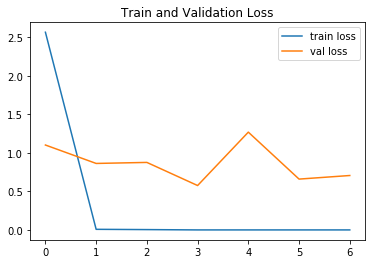

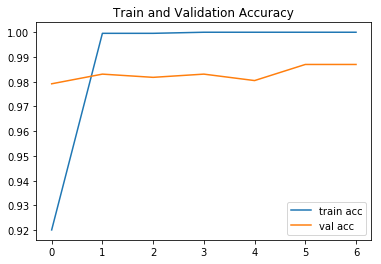

[0.9791666865348816,
 0.9830729365348816,
 0.9817708134651184,
 0.9830729365348816,
 0.98046875,
 0.9869791865348816,
 0.9869791865348816]

In [101]:
# plot loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()

# plot train
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Train and Validation Accuracy')
plt.show()


In [102]:
print("Final training accuracy = {}".format(result.history["accuracy"][-1]))
print("Final validation accuracy = {}".format(result.history["val_accuracy"][-1]))

Final training accuracy = 1.0
Final validation accuracy = 0.9869791865348816
